- 11월에 사서 4월에 팔아라.

In [1]:
!pip install finance-datareader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.3/89.3 kB 1.9 MB/s eta 0:00:00


## KOSPI

### 단순 보유

In [2]:
import FinanceDataReader as fdr
import pandas as pd
kospi = fdr.DataReader('KS11', '2003')
kospi.head()

,Open,High,Low,Close,Volume,Change,UpDown,Comp,Amount,MarCap
Date,,,,,,,,,,
2003-01-02,633.03,637.10,623.75,635.17,742864455,0.0121,1,7.62,1353153550790,261857165110195
2003-01-03,651.59,662.40,649.62,661.10,1005749532,0.0408,1,25.93,2270513510940,272658428956945
2003-01-06,665.10,667.71,657.61,666.71,721798375,0.0085,1,5.61,1598625579510,274821496481790
2003-01-07,679.00,679.30,652.14,652.20,690116512,-0.0218,2,-14.51,1869970510665,268902265957030
2003-01-08,655.97,660.39,650.93,651.72,604873252,-0.0007,2,-0.48,1488455704305,268712288402540


In [7]:
kospi['cum_return'] = (kospi['Change'] + 1).cumprod() - 1

In [10]:
last_cum_return = kospi['cum_return'].iloc[-1]

In [11]:
투자기간 = len(kospi) / 252
buyAndHold_CAGR = (last_cum_return + 1) ** (1/투자기간) - 1
print(buyAndHold_CAGR)

0.06626581951050858


### 할로윈

In [13]:
kospi_h = fdr.DataReader('KS11', '2003')
kospi_h.head()

,Open,High,Low,Close,Volume,Change,UpDown,Comp,Amount,MarCap
Date,,,,,,,,,,
2003-01-02,633.03,637.10,623.75,635.17,742864455,0.0121,1,7.62,1353153550790,261857165110195
2003-01-03,651.59,662.40,649.62,661.10,1005749532,0.0408,1,25.93,2270513510940,272658428956945
2003-01-06,665.10,667.71,657.61,666.71,721798375,0.0085,1,5.61,1598625579510,274821496481790
2003-01-07,679.00,679.30,652.14,652.20,690116512,-0.0218,2,-14.51,1869970510665,268902265957030
2003-01-08,655.97,660.39,650.93,651.72,604873252,-0.0007,2,-0.48,1488455704305,268712288402540


<Axes: xlabel='Month'>

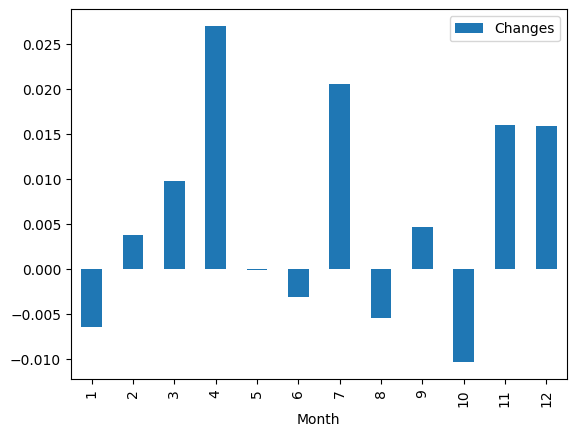

In [23]:
monthly_kospi_h = kospi_h.resample('MS').agg({'Open' : 'first','Close': 'last'})
monthly_kospi_h['Changes'] = monthly_kospi_h.pct_change(axis = 1).iloc[:, -1]
monthly_kospi_h['Month'] = monthly_kospi_h.index.month
monthly_Changes = monthly_kospi_h[['Month', 'Changes']].groupby('Month').mean()
monthly_Changes.plot(kind = 'bar')

In [72]:
h_kospi_oc = monthly_kospi_h[monthly_kospi_h['Month'].isin([4, 11])]
h_kospi_oc['Year'] = h_kospi_oc.index.year
h_kospi_oc.drop(['Changes'], axis = 1, inplace = True)

h_kospi_month11 = h_kospi_oc[h_kospi_oc['Month'] == 11][['Open', 'Year']].rename(columns = {'Open' : 'Buy'})
h_kospi_month4 = h_kospi_oc[h_kospi_oc['Month'] == 4][['Close', 'Year']].rename(columns = {'Close' : 'Sell'})
h_kospi_month4.head()

<ipython-input-72-bac38e521b5a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_kospi_oc['Year'] = h_kospi_oc.index.year
<ipython-input-72-bac38e521b5a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_kospi_oc.drop(['Changes'], axis = 1, inplace = True)


,Sell,Year
Date,,
2003-04-01,599.35,2003
2004-04-01,862.84,2004
2005-04-01,911.30,2005
2006-04-01,1419.73,2006
2007-04-01,1542.24,2007


In [81]:
buy_h = h_kospi_month11.reset_index(drop = True).rename(columns = {'Year' : 'buy_date'})
sell_h = h_kospi_month4.shift(-1).reset_index(drop = True).rename(columns = {'Year' : 'sell_date'})

In [87]:
kospi_h = pd.concat([buy_h, sell_h], axis = 1).drop(['buy_date', 'sell_date'], axis = 1)
kospi_h.index = h_kospi_month4['Year'] + 1 # 다음해 판매
kospi_h.head()

,Buy,Sell
Year,,
2004,783.08,862.84
2005,832.52,911.30
2006,1165.77,1419.73
2007,1372.03,1542.24
2008,2085.33,1825.47


In [88]:
kospi_h['Change'] = (kospi_h['Sell'] - kospi_h['Buy']) / kospi_h['Buy']
kospi_h.head()

,Buy,Sell,Change
Year,,,
2004,783.08,862.84,0.101854
2005,832.52,911.30,0.094628
2006,1165.77,1419.73,0.217847
2007,1372.03,1542.24,0.124057
2008,2085.33,1825.47,-0.124613


In [91]:
누적수익률 = ((kospi_h['Change'] + 1).cumprod() - 1).dropna().iloc[-1]
누적수익률

3.5256907918703693

In [92]:
h_CAGR = (누적수익률 + 1) ** (1/투자기간) - 1
print(h_CAGR)

0.07287151495140964


## S&P500

### 단순보유

In [93]:
sp500 = fdr.DataReader('US500', '2002')

In [99]:
sp500['Changes'] = sp500['Close'].pct_change()
sp500 = sp500.dropna()
sp500['cum_return'] = (sp500['Changes'] + 1).cumprod() - 1
sp500.tail()

<ipython-input-99-1c62bacdc299>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500['Changes'] = sp500['Close'].pct_change()
<ipython-input-99-1c62bacdc299>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500['cum_return'] = (sp500['Changes'] + 1).cumprod() - 1


,Open,High,Low,Close,Volume,Adj Close,Changes,cum_return
2024-11-13,5985.750000,6008.189941,5965.910156,5985.379883,4220180000,5985.379883,0.000232,4.104758
2024-11-14,5989.680176,5993.879883,5942.279785,5949.169922,4184570000,5949.169922,-0.006050,4.073876
2024-11-15,5912.790039,5915.319824,5853.009766,5870.620117,4590960000,5870.620117,-0.013203,4.006883
2024-11-18,5874.169922,5908.120117,5865.950195,5893.620117,3983860000,5893.620117,0.003918,4.026499
2024-11-19,5870.049805,5923.509766,5855.290039,5916.979980,4036940000,5916.979980,0.003964,4.046422


In [100]:
snp500_last_cum_return = sp500['cum_return'].iloc[-1]

In [101]:
invest_period = len(sp500) / 252
buyAndHold_CAGR = (snp500_last_cum_return + 1) ** (1/invest_period) - 1
print(buyAndHold_CAGR)

0.07341142297080205


### 할로윈

In [102]:
sp500_h = fdr.DataReader('US500', '2002')

<Axes: xlabel='Month'>

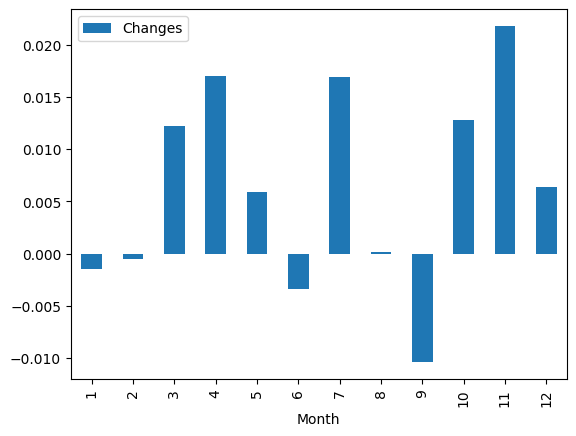

In [103]:
monthly_snp500_h = sp500_h.resample('MS').agg({'Open' : 'first','Close': 'last'})
monthly_snp500_h['Changes'] = monthly_snp500_h.pct_change(axis = 1).iloc[:, -1]
monthly_snp500_h['Month'] = monthly_snp500_h.index.month
monthly_Changes = monthly_snp500_h[['Month', 'Changes']].groupby('Month').mean()
monthly_Changes.plot(kind = 'bar')

In [104]:
h_snp500_oc = monthly_snp500_h[monthly_snp500_h['Month'].isin([4, 11])]
h_snp500_oc['Year'] = h_snp500_oc.index.year
h_snp500_oc.drop(['Changes'], axis = 1, inplace = True)

h_snp500_month11 = h_snp500_oc[h_snp500_oc['Month'] == 11][['Open', 'Year']].rename(columns = {'Open' : 'Buy'})
h_snp500_month4 = h_snp500_oc[h_snp500_oc['Month'] == 4][['Close', 'Year']].rename(columns = {'Close' : 'Sell'})
h_snp500_month4.head()

<ipython-input-104-0aee238ebbfc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_snp500_oc['Year'] = h_snp500_oc.index.year
<ipython-input-104-0aee238ebbfc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_snp500_oc.drop(['Changes'], axis = 1, inplace = True)


,Sell,Year
2002-04-01,1076.920044,2002
2003-04-01,916.919983,2003
2004-04-01,1107.300049,2004
2005-04-01,1156.849976,2005
2006-04-01,1310.609985,2006


In [105]:
buy_h = h_snp500_month11.reset_index(drop = True).rename(columns = {'Year' : 'buy_date'})
sell_h = h_snp500_month4.shift(-1).reset_index(drop = True).rename(columns = {'Year' : 'sell_date'})

In [108]:
snp500_h = pd.concat([buy_h, sell_h], axis = 1).drop(['buy_date', 'sell_date'], axis = 1)
snp500_h.index = h_snp500_month4['Year'] + 1 # 다음해 판매
snp500_h.head()

,Buy,Sell
Year,,
2003,885.760010,916.919983
2004,1050.709961,1107.300049
2005,1130.199951,1156.849976
2006,1207.010010,1310.609985
2007,1377.760010,1482.369995


In [109]:
snp500_h['Change'] = (snp500_h['Sell'] - snp500_h['Buy']) / snp500_h['Buy']
snp500_h.head()

,Buy,Sell,Change
Year,,,
2003,885.760010,916.919983,0.035179
2004,1050.709961,1107.300049,0.053859
2005,1130.199951,1156.849976,0.023580
2006,1207.010010,1310.609985,0.085832
2007,1377.760010,1482.369995,0.075928


In [110]:
누적수익률 = ((snp500_h['Change'] + 1).cumprod() - 1).dropna().iloc[-1]
누적수익률

2.3344863106036247

In [111]:
h_CAGR = (누적수익률 + 1) ** (1/invest_period) - 1
print(h_CAGR)

0.054120997086212874
